In [1]:
import numpy as np # array manipulation
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  ## plotting graphs of the numeric columns
import seaborn as sns            ## drawing attractive statistical graphs
import collections               ##  for getting outliers
%matplotlib inline

from matplotlib import style
style.use("ggplot")
import math


In [2]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

e:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
x = df['yr_built']
y = df['price']

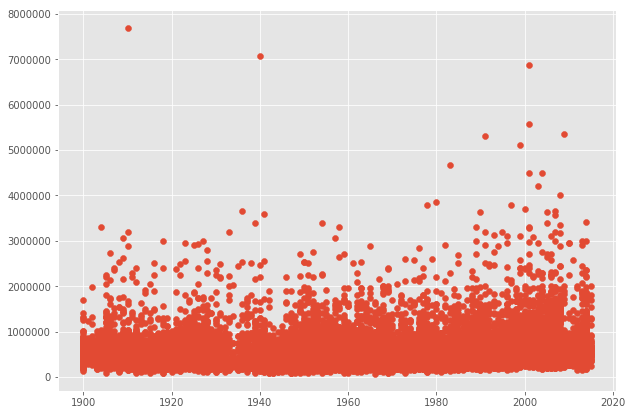

In [5]:
plt.figure(figsize= (10,7))
plt.scatter(x,y)

In [6]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Building and Running your model

In [7]:
print(df.shape)

(21613, 22)


### Use zip code column and price column to predict the price of property on the basis of area

In [8]:
X= df.iloc[:,[3,17]].values

In [9]:
X

array([[ 221900.,   98178.],
       [ 538000.,   98125.],
       [ 180000.,   98028.],
       ..., 
       [ 402101.,   98144.],
       [ 400000.,   98027.],
       [ 325000.,   98144.]])

### Using elbow method to get number of clusters

### Method to get the number of clusters

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300 , n_init = 10, random_state= 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

Text(0,0.5,'wcss')

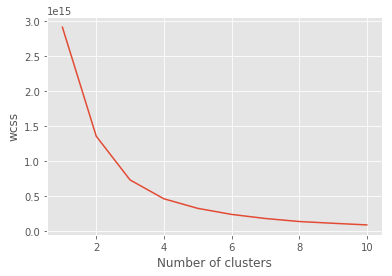

In [11]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

### The above graph shows that after 6 number of clusters the variation in graph decreases. So it shows that 6 clusters are needed for this dataset

In [12]:
### Applying k - means to the dataset

In [13]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300 , n_init = 10, random_state= 0)
y_kmeans = kmeans.fit_predict(X)

In [14]:
### Visualizing the clusters
kmeans
y_kmeans

array([3, 0, 3, ..., 3, 3, 3])

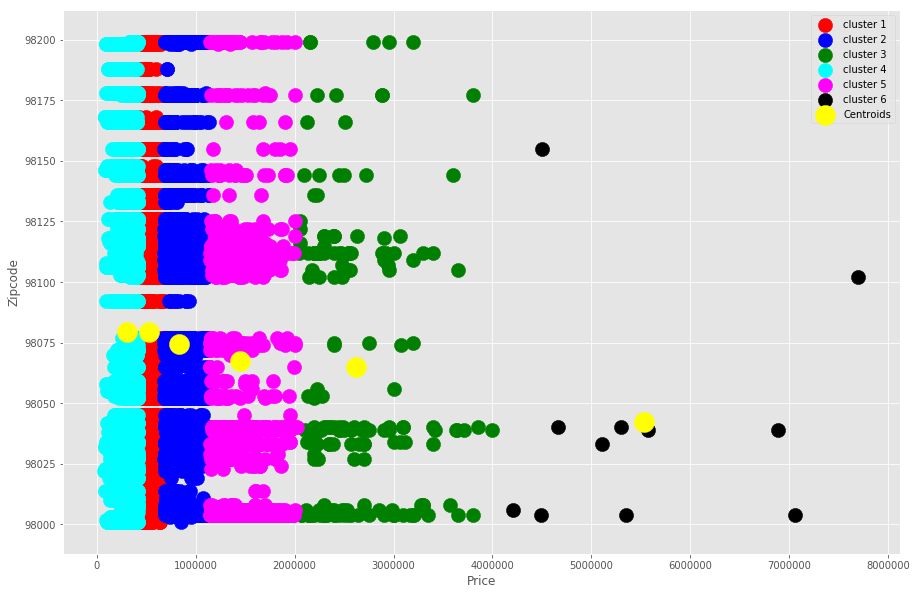

In [15]:
plt.figure(figsize= (15,10))
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0 , 1],s = 200, c='red', label = 'cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans == 1 , 1],s = 200, c='blue', label = 'cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans == 2 , 1],s = 200, c='green', label = 'cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans == 3 , 1],s = 200, c='cyan', label = 'cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans == 4 , 1],s = 200, c='magenta', label = 'cluster 5')
plt.scatter(X[y_kmeans==5,0],X[y_kmeans == 5 , 1],s = 200, c='black', label = 'cluster 6')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 400 , c = 'yellow', label = 'Centroids')
plt.xlabel("Price")
plt.ylabel("Zipcode")

plt.legend()

### The above graph shows 6 clusters with yellow dot as a centroid of clusters
### It shows that housing with prices above 2000000 are at the location with zipcode 98000 and 98050

In [17]:
kmeans.cluster_centers_

array([[  530395.0906811 ,    98079.5560982 ],
       [  832805.25480225,    98074.60508475],
       [ 2619758.81081081,    98064.95135135],
       [  300523.36880869,    98079.2265158 ],
       [ 1442357.55627009,    98067.54340836],
       [ 5531209.09090909,    98042.36363636]])

### The above array shows the centers of the clusters

### Hierarchical Clustering

### Creating a pivot table with zipcode as index

In [55]:
df_pivot2 = pd.pivot_table(df, values='price' , index='zipcode')

In [56]:
df_pivot2

,price
zipcode,
98001,2.808047e+05
98002,2.342840e+05
98003,2.941113e+05
98004,1.355927e+06
98005,8.101649e+05
98006,8.596848e+05
98007,6.171051e+05
98008,6.455074e+05
98010,4.236660e+05


In [57]:
df_pivot2.shape

(70, 1)

### Scaling the variables

In [59]:
scld = MinMaxScaler(feature_range = (0,1))
df_pivot2.fillna(0)
arr_scld = scld.fit_transform(df_pivot2)
df_scld = pd.DataFrame(arr_scld , columns = df_pivot2.columns)
df_scld.head()

,price
0,0.024150
1,0.000000
2,0.031058
3,0.582272
4,0.298953


In [60]:
### Use linkage for further analysis

In [32]:
dist = linkage(df_scld,'ward')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b',
  'b'],
 'dcoord': [[0.0, 3.0994324810823537e-05, 3.0994324810823537e-05, 0.0],
  [0.0, 4.2771360166865557e-05, 4.2771360166865557e-05, 0.0],
  [3.0994324810823537e-05,
   0.00077211435075311065,
   0.00077211435075311065,
   4.2771360166865557e-05],
  [0.0, 0.0016887702244793301, 0.0016887702244793301, 0.0],
  [0.00077211435075311065,
   0.0042027747706848808,
   0.0042027747706848808,
   0.0016887702244793301],
  [0.0, 0.011488133684691074, 0.011488133684691074, 0.0042027747706848808],
  [0.0, 0.0014908

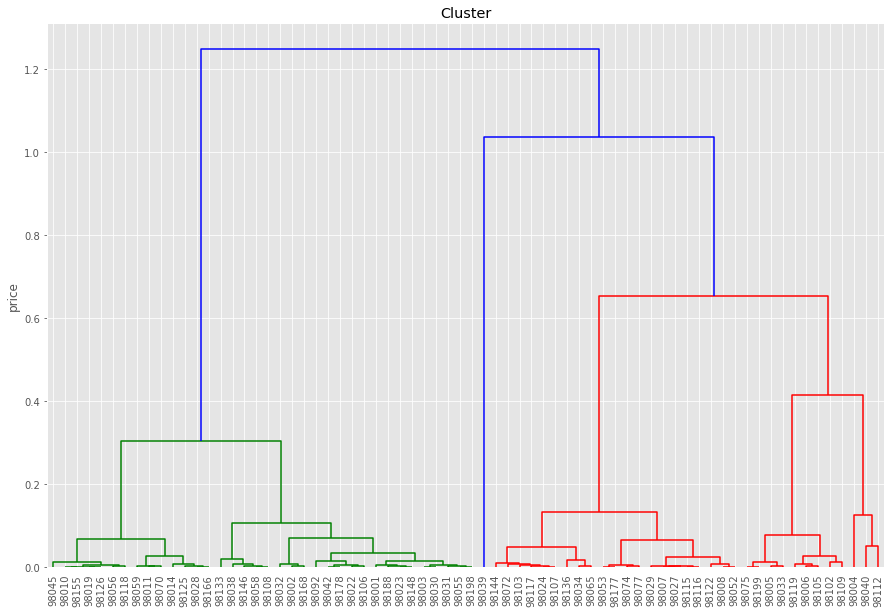

In [35]:
plt.figure(figsize=(15,10))
plt.title('Cluster')
plt.ylabel('price')
dendrogram(dist,labels = df_pivot2.index,leaf_font_size = 10,leaf_rotation = 90)


 ###  Above dendogram shows that there are 3 major clusters formed for prices with respect to zipcode

In [61]:
lbl = fcluster(dist,2,criterion = 'distance')
type(lbl)
print(lbl)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [62]:
df_pivot2['cluster'] = lbl

In [63]:
### Getting cluster for price 

In [64]:
clust = pd.pivot_table(df_pivot2, values='price' , index='cluster')

In [65]:
np.round(clust,2)

,price
cluster,
1,560773.71


### Using hierarchical clustering we get one cluster for predicting price

### Both the clustering method give different number of clusters 
### Scaling in hierarchical clustering may affect the result or hierarchical clustering may not be the proper method for this dataset
### K-means provides interesting groupings which makes sense which predicts the price according to the zipcode